In [1]:
import b2d
import numpy as np
import b2d.plot
import matplotlib.pyplot as plt
from IPython.display import HTML
import random
from b2d.testbed import TestbedBase
from b2d.testbed.backend.jupyter import JupyterGui
from matplotlib.animation import ImageMagickWriter
import copy
import math
from scipy.spatial import Delaunay

In [2]:
def ellipse_chain_shape(positon, a, b, n=50):

    t = np.linspace(start=0, stop=2.0 * np.pi, num=n + 1)
    x = (a * np.cos(t) + positon[0])[:-1]
    y = (b * np.sin(t) + positon[1])[:-1]
    verts = np.stack([x, y], -1)
    verts = np.require(verts, requirements=["C"])
    #print(np.flip(verts, axis=0))
    arr=np.flip(verts, axis=0)
    #print(arr,arr[0],arr[:, 0])
    x = arr[:, 0]
    y = arr[:, 1]
    

    

    # combine x and y coordinates and convert to tuple
    result = list(zip(x, y))
    #print(result)
    
    return result





def generate_tuples(n):
    tuples_list = [(random.randint(5, 45),random.randint(5, 45))]
    while len(tuples_list)<n:
        x = random.randint(5, 45)
        y = random.randint(5, 45)
        tuples_list=add_new_point(tuples_list, x, y, 5)
    return tuples_list



def distance(p1, p2):
    
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def add_new_point(tuples_list, x_new, y_new, d):
    
    new_point = (x_new, y_new)
    for point in tuples_list:
        if distance(point, new_point) < d:
            return tuples_list
    

    tuples_list.append(new_point)
    return tuples_list



In [138]:
print(stop)
world = b2d.world(gravity=(0, 0))
pdef = b2d.particle_system_def(radius=0.1,elastic_strength=50)
psystem = world.create_particle_system(pdef)


dimensions = [30, 30]
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(
    position=(0, 0), fixtures=b2d.fixture_def(shape=box_shape, friction=0)
)

NameError: name 'stop' is not defined

In [139]:
emitter_pos = (0.1, 0)
emitter_def = b2d.RandomizedLinearEmitterDef()
emitter_def.emite_rate = 40
emitter_def.lifetime = 20.1
emitter_def.size = (2, 1)
# emitter_def.transform = b2d.Transform(emitter_pos, b2d.Rot(0))
emitter_def.velocity = (-40, 20)
emitter = b2d.RandomizedLinearEmitter(psystem, emitter_def)

NameError: name 'psystem' is not defined

In [ ]:
#fig, ax, ani = b2d.plot.animate_world(
#    world, ppm=20, bounding_box=((-10, -20), (20, 15)), pre_step=emitter.step, t=5
#)
#ani
#plt.show()
#HTML(ani.to_jshtml())
#IPython.display.HTML

In [ ]:
class ColorMixing(TestbedBase):

    name = "ColorMixing"

    def __init__(self, settings=None):
        super(ColorMixing, self).__init__(settings=settings)
        dimensions = [30, 30]

        # the outer box
        box_shape = b2d.ChainShape()
        box_shape.create_loop(
            [
                (0, 0),
                (0, dimensions[1]),
                (dimensions[0], dimensions[1]),
                (dimensions[0], 0),
            ]
        )
        box = self.world.create_static_body(position=(0, 0), shape=box_shape)

        fixtureA = b2d.fixture_def(
            shape=b2d.circle_shape(1), density=2.2, friction=0.2, restitution=0.5
        )
        body = self.world.create_dynamic_body(position=(13, 10), fixtures=fixtureA)

        pdef = b2d.particle_system_def(
            viscous_strength=0.9,
            spring_strength=0.0,
            damping_strength=0.5,
            pressure_strength=0.5,
            color_mixing_strength=0.008,
            density=2,
        )
        psystem = self.world.create_particle_system(pdef)
        psystem.radius = 0.3
        psystem.damping = 1.0

        colors = [
            (255, 0, 0, 255),
            (0, 255, 0, 255),
            (0, 0, 255, 255),
            (255, 255, 0, 255),
        ]
        posiitons = [(6, 10), (20, 10), (20, 20), (6, 20)]
        for color, pos in zip(colors, posiitons):

            shape = b2d.polygon_shape(box=(5, 5), center=pos, angle=0)
            pgDef = b2d.particle_group_def(
                flags=b2d.ParticleFlag.waterParticle
                | b2d.ParticleFlag.colorMixingParticle,
                # group_flags=b2d.ParticleGroupFlag.solidParticleGroup,
                shape=shape,
                strength=1.0,
                color=color,
            )
            group = psystem.create_particle_group(pgDef)



In [ ]:

#b2d.loop_shape(np.flip(verts, axis=0))


dimensions = [30, 30]
world=b2d.world(gravity=(0, 0))
# the outer box
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(position=(0, 0), shape=box_shape)

#fixtureA = b2d.fixture_def(
#    shape=b2d.circle_shape(1), density=2.2, friction=0.2, restitution=0.5
#)
#body = world.create_dynamic_body(position=(13, 10), fixtures=fixtureA)

pdef = b2d.particle_system_def(
    viscous_strength=0.9,
    spring_strength=0.8,
    damping_strength=0.5,
    pressure_strength=0.5,
    color_mixing_strength=0.108,
    density=2,
    elastic_strength=0.8
)
psystem = world.create_particle_system(pdef)
psystem.radius = 0.3
psystem.damping = 1.0

colors = [
    (255, 0, 0, 255),
    (0, 255, 0, 255),
    (0, 0, 255, 255),
    (255, 255, 0, 255),
]
verts=[(0, 0),(0, dimensions[1]),(dimensions[0], dimensions[1]),(dimensions[0], 0)]
#print('verts0',verts)
posiitons = [(8, 19), (20, 10), (20, 20), (6, 20)]
for color, pos in zip(colors, posiitons):
    a=2*np.random.random_sample()-1
    b=2*np.random.random_sample()-1
    verts=ellipse_chain_shape(pos, 5+a, 4.5+b, n=11),
    #print('verts1',verts[0])

    #shape = b2d.polygon_shape(box=(5, 5), center=pos, angle=0)
    pgDef = b2d.particle_group_def(
        flags=b2d.ParticleFlag.elasticParticle,
        #| b2d.ParticleFlag.colorMixingParticle,
        group_flags=b2d.ParticleGroupFlag.solidParticleGroup,
        linear_velocity=(2*np.random.random_sample()-2, 2*np.random.random_sample()-2),
        shape=b2d.polygon_shape(center=pos, vertices=verts[0]),#b2d.polygon_shape(center=pos, vertices=verts),#ellipse_chain_shape(pos, 5, 2, n=500),#b2d.circle_shape(3,pos)
        strength=1.0,
        color=color,
    )
    group = psystem.create_particle_group(pgDef)
    #print(group.linear_velocity)
    #help(group)


In [ ]:
fig, ax, ani = b2d.plot.animate_world(world,t=10)
#help(world)
#print(world.find_body((8, 19), margin=50))
#print(world.find_closest_n_particles((8, 19), r=50))
HTML(ani.to_jshtml())
#with open('animation.html', 'w') as f:
#    f.write(html.data)
    
#writer = ImageMagickWriter(fps=30)

# save the animation as a GIF
#ani.save('animation.gif', writer=writer)

In [124]:
def star_shape(positon, a, b, n=10):

    t = np.linspace(start=0, stop=2.0 * np.pi, num=n)
    t2 = np.linspace(start=0, stop=2.0 * np.pi, num=int(n/2))
    #print(t)
    #x = (a * np.cos(t) + positon[0])[:-1]
    #y = (b * np.sin(t) + positon[1])[:-1]
    r=0.1 * np.random.randn(n) + 6
    r2=0.1 * np.random.randn(int(n/2)) + 6
    r[-1]=r[0]
    r2[-1]=r2[0]
    #al=np.sort(2*np.pi*np.random.random_sample((n,)))
    #print(al)
    os=0.2 * np.random.randn() + 2
    os2=0.2 * np.random.randn() + 2
    os3=0.2 * np.random.randn() + 2
    x_0=np.array([positon[0]])
    y_0=np.array([positon[1]])
    x=r*np.cos(t+os)+positon[0]
    y=r*np.sin(t+os)+positon[1]
    
    pm=np.random.choice([-1, 1], size=n)
    pm2=np.random.choice([-1, 1], size=n)
    pm0=np.random.choice([-1, 1], size=1)
    pm02=np.random.choice([-1, 1], size=1)
    
    x_org=copy.deepcopy(x).tolist()
    y_org=copy.deepcopy(y).tolist()
    
    
    r_w_1=np.random.uniform(0.08, 0.35, int(n/2))
    r_w_2=np.random.uniform(0.40, 0.75, n)
    
    r_in = r2*r_w_1
    x_in=r_in*np.cos(t2+os2)+positon[0]
    y_in=r_in*np.sin(t2+os2)+positon[1]
    
    x_in=x_in[1:]
    y_in=y_in[1:]
    
    
    
    r_in2 = r*r_w_2
    x_in2=r_in2*np.cos(t+os3)+positon[0]
    y_in2=r_in2*np.sin(t+os3)+positon[1]
    #print('x_org',x_org)
    
    x_in2=x_in2[1:]
    y_in2=y_in2[1:]
    
    x_in=np.concatenate((x_in, x_in2,x_org))
    y_in=np.concatenate((y_in, y_in2,y_org))
    #x=x.tolist()
    #y=y.tolist()
    x=[x_org[0]]
    y=[y_org[0]]
    

    for i in range(len(x_org)):
        x0, y0 = x_org[i], y_org[i]
        try:
            x1, y1 = x_org[i + 1], y_org[i + 1]
            n_interpolations = n_dens(1/(np.sqrt(2)*0.2),x_org[i], y_org[i],x_org[i + 1], y_org[i + 1])
            flag=True
        except:
            x1, y1 = x_org[0], y_org[0]
            n_interpolations = n_dens(1/(np.sqrt(2)*0.2),x_org[i], y_org[i],x_org[0], y_org[0])
            flag=False
        
        dx = (x1 - x0) / (n_interpolations + 1)
        for j in range(n_interpolations):
            x_interpolated = x0 + (j + 1) * dx
            y_interpolated = y0 + (x_interpolated - x0) * ((y1 - y0) / (x1 - x0))
            #print('x_int',x_interpolated)
            x.append(x_interpolated)
            y.append(y_interpolated)
        if flag:
            x.append(x1)
            y.append(y1)  
            
            
        


    
    #x=x+x_org
    #y=y+y_org
    x=np.array(x)
    y=np.array(y)
    
    #x=np.append(x_0,x)
    #y=np.append(y_0,y)
    x_0_p=x_0#+#pm0*r[-1]*(((0.5 * np.random.randn() + 5)/100))
    y_0_p=y_0#+#pm02*r[-1]*(((0.5 * np.random.randn() + 5)/100))
    x_in=np.append(x_0_p,x_in)
    y_in=np.append(y_0_p,y_in)
    #print('x',x)
    #print('y',y)
    
    l=len(x)
    
    
    
    
    
    
    
    
    
    
    
    verts = np.stack([x, y], -1)
    verts = np.require(verts, requirements=["C"])
    #print(np.flip(verts, axis=0))
    arr=np.flip(verts, axis=0)
    #print(arr,arr[0],arr[:, 0])
    x = arr[:, 0]
    y = arr[:, 1]
    
    #print('x2',x)

    

    # combine x and y coordinates and convert to tuple
    result = list(zip(x, y))
    #print(result)
    
    
    
    verts_in = np.stack([x_in, y_in], -1)
    verts_in = np.require(verts_in, requirements=["C"])

    arr_in=np.flip(verts_in, axis=0)

    x_in = arr_in[:, 0]
    y_in = arr_in[:, 1]
    
    result_in = list(zip(x_in, y_in))
    
    
    
    verts_org = np.stack([x_org, y_org], -1)
    verts_org = np.require(verts_org, requirements=["C"])

    arr_org=np.flip(verts_org, axis=0)

    x_org = arr_org[:, 0]
    y_org = arr_org[:, 1]
    
    result_org = list(zip(x_org, y_org))
    
    return result,l,result_in,result_org


def leng(tup_a,tup_b):
    dx=tup_a[0]-tup_b[0]
    dy=tup_a[1]-tup_b[1]
    return np.sqrt((dx**2)+(dy**2))

def n_dens(d,x1,y1,x2,y2):
    l=leng((x1,y1),(x2,y2))
    return int(l*d)


def int_corners(point_list,n):
    
    for i in range(len(point_list)-1):
        p1 = point_list[i]
        p2 = point_list[i+1]
        if i % n == n-1:
            mean = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
            point_list.insert(i+1, mean)
            
    return point_list


def Del_in(verts_in):
    points = verts_in

    
    point_array = np.array(points)

    
    triangulation = Delaunay(point_array)


    unique_tuples = set()


    for triangle in triangulation.simplices:
        arr=point_array[triangle]
        print('a',arr)
        # iterate over each pair of tuples in the array
        for i in range(arr.shape[0]):
            try:
                tuple1 = tuple(arr[i])
                tuple2 = tuple(arr[i+1])
            except:
                tuple1 = tuple(arr[i])
                tuple2 = tuple(arr[0])

            print('t1',tuple1)
            print('t2',tuple2)
            # check if the tuple pair is already in the set
            if (tuple1, tuple2) in unique_tuples or (tuple2, tuple1) in unique_tuples:
                # if it is, delete the tuples from the array
                #arr = np.delete(arr, i+1, axis=0)
                print('++++',(tuple1, tuple2))
            else:
                # otherwise, add the tuple pair to the set
                unique_tuples.add((tuple1, tuple2))

        # print the cleaned array for each iteration
        print(arr)


    #print(list(unique_tuples)[0])
    return list(unique_tuples)


def find_body(tup,bodies):
    tup_list=[]
    for b in range(len(bodies)):
        print('tup_listappend',bodies[b].world_center) 
        tup_list.append(bodies[b].world_center)
    print('tup_list',tup_list)    
    index,dist = find_closest_index(tup_list, tup)
    return bodies[index]


def find_closest_index(tuples_list, target_tuple):
    closest_dist = math.inf
    closest_index = None
    for i, t in enumerate(tuples_list):
        dist = math.sqrt((t[0]-target_tuple[0])**2 + (t[1]-target_tuple[1])**2)
        if dist < closest_dist:
            closest_dist = dist
            closest_index = i
    return closest_index,closest_dist 

In [128]:
world=b2d.world(gravity=(0, 0))
# the outer box
dimensions = [20,20]#[50, 50]
box_shape = b2d.ChainShape()
box_shape.create_loop(
    [
        (0, 0),
        (0, dimensions[1]),
        (dimensions[0], dimensions[1]),
        (dimensions[0], 0),
    ]
)
box = world.create_static_body(position=(0, 0), shape=box_shape)

bodies = []

# create  a static body as anchor
#b = world.create_static_body(
#    position=(0, 4), fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.3, 0.5]))
#)
#bodies.append(b)
posiitons = generate_tuples(4)

for pos in posiitons:
    bodies = []
    bodies_in=[]
    bodies_org=[]
    num=12
    verts,l,verts_in,verts_org=star_shape(pos, 1, 1, n=num)
    uni_tuple_list=Del_in(verts_in)
    #print('v',verts)
    v1=2*np.random.random_sample()-1
    v2=2*np.random.random_sample()-1
    print('l',l)
    for i in range(l):
        #print(verts[i])
        
        b = world.create_dynamic_body(
            position=verts[i],
            fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.2, 0.2]), density=0.1),
            linear_damping=0,
            angular_damping=0,
            linear_velocity=(20*v1,20*v2),
        )
        bodies.append(b)
#create_distance_joint(anchor, body, length=10, stiffness=0.5 * (i + 1))
    for k in range(len(verts_in)):
        b = world.create_dynamic_body(
            position=verts_in[k],
            fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.2, 0.2]), density=0.1),
            linear_damping=0,
            angular_damping=0,
            linear_velocity=(20*v1,20*v2),
        )
        
        bodies_in.append(b)
    
    for t in range(len(verts_org)):
        b = world.create_dynamic_body(
            position=verts_org[t],
            fixtures=b2d.fixture_def(shape=b2d.polygon_shape(box=[0.2, 0.2]), density=0.1),
            linear_damping=0,
            angular_damping=0,
            linear_velocity=(20*v1,20*v2),
        )
        
        bodies_org.append(b)
        
    for j in range(len(bodies)):
        if j!=len(bodies) - 1:
            
            a = bodies[j]
            b = bodies[j + 1]
            #print(a.world_center)
            world.create_distance_joint(
                a,
                b,
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(a.world_center,b.world_center),
                stiffness=10**6,
            )
            
            #world.create_weld_joint(
             #   a,
             #   b,
             #   local_anchor_a=(0.2, -0.2),
             #   local_anchor_b=(-0.2, -0.2),
             #   damping=0.1,
             #   reference_angle=0,
             #   stiffness=10**8,
            #)
            
            '''
            a = bodies[-1]
            b = bodies[j]
            
            world.create_distance_joint(
                a,
                b,
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(a.world_center,b.world_center),
                stiffness=10,
            )
            '''
            
            #world.create_weld_joint(
            #    a,
            #    b,
            #    local_anchor_a=(0.2, -0.2),
            #    local_anchor_b=(-0.2, -0.2),
            #    damping=0.1,
            #    reference_angle=0,
            #    stiffness=10**7,
            #)
            
    world.create_distance_joint(
                bodies[-1],
                bodies[0],
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(bodies[-1].world_center,bodies[0].world_center),
                stiffness=10**6,
            )
    '''
    world.create_distance_joint(
                bodies[-1],
                bodies[-2],
                local_anchor_a=(0.0, 0.0),
                local_anchor_b=(0.0, 0.0),
                damping=0.0,
                length=leng(bodies[-2].world_center,bodies[-1].world_center),
                stiffness=10,
            )
    '''
    for n in range(len(uni_tuple_list)):
        tup_pair=uni_tuple_list[n]
        a = find_body(tup_pair[0],bodies_in)
        b = find_body(tup_pair[1],bodies_in)
            #print(a.world_center)
        world.create_distance_joint(
            a,
            b,
            local_anchor_a=(0.0, 0.0),
            local_anchor_b=(0.0, 0.0),
            damping=0.0,
            length=leng(a.world_center,b.world_center),
            stiffness=10,
        )

    for s in range(num):
        a = bodies_org[s]
        b = find_body(a.world_center,bodies_in)
        print('a',a.world_center)
        print('b',b.world_center)
        world.create_weld_joint(
            a,
            b,
            local_anchor_a=(0.0, 0.0),
            local_anchor_b=(0.0, 0.0),
        )

#print(world.find_closest_n_bodies((8, 19), r=50)((8, 19), margin=50))

print(verts_in)

a [[16.38654862 34.75901095]
 [18.74411792 34.25128491]
 [18.86867037 37.66012945]]
t1 (16.38654861584079, 34.75901095117841)
t2 (18.744117919156665, 34.25128491472422)
t1 (18.744117919156665, 34.25128491472422)
t2 (18.86867036575968, 37.66012945152212)
t1 (18.86867036575968, 37.66012945152212)
t2 (16.38654861584079, 34.75901095117841)
[[16.38654862 34.75901095]
 [18.74411792 34.25128491]
 [18.86867037 37.66012945]]
a [[10.49216134 30.64972771]
 [11.5359265  33.2817165 ]
 [ 7.7148564  32.67707472]]
t1 (10.49216134371019, 30.64972771020948)
t2 (11.535926504336706, 33.281716500150786)
t1 (11.535926504336706, 33.281716500150786)
t2 (7.714856402155434, 32.677074718843805)
t1 (7.714856402155434, 32.677074718843805)
t2 (10.49216134371019, 30.64972771020948)
[[10.49216134 30.64972771]
 [11.5359265  33.2817165 ]
 [ 7.7148564  32.67707472]]
a [[16.16919609 39.20584288]
 [17.03728382 40.56691889]
 [13.93308986 42.06216574]]
t1 (16.169196091467388, 39.20584288000041)
t2 (17.037283821430165, 40.56

tup_listappend (49.129986,30.274143)
tup_listappend (50.121178,26.980793)
tup_listappend (48.973404,23.781691)
tup_listappend (46.491024,21.499805)
tup_listappend (43.138245,21.137020)
tup_listappend (40.172413,22.610638)
tup_listappend (37.993053,25.256657)
tup_listappend (38.267632,28.702732)
tup_listappend (40.051559,31.585741)
tup_listappend (43.147987,33.060825)
tup_listappend (42.568989,29.182211)
tup_listappend (43.969543,30.304274)
tup_listappend (45.500130,29.382240)
tup_listappend (47.314911,28.550951)
tup_listappend (46.573467,26.654169)
tup_listappend (46.153904,25.168116)
tup_listappend (44.704136,24.681206)
tup_listappend (42.933712,23.240723)
tup_listappend (41.384506,24.691114)
tup_listappend (39.757992,26.350130)
tup_listappend (40.237839,28.676388)
tup_listappend (43.055534,28.142557)
tup_listappend (44.716148,28.127508)
tup_listappend (44.607944,26.843657)
tup_listappend (44.041748,26.332348)
tup_listappend (43.222786,26.692625)
tup_listappend (44.000000,27.000000)
t

/home/mo/anaconda3/envs/pysics/lib/python3.10/site-packages/b2d/plot.py:128: UserWarning: You passed in an explicit save_count=145 which is being ignored in favor of frames=145.
  ani = animation.FuncAnimation(


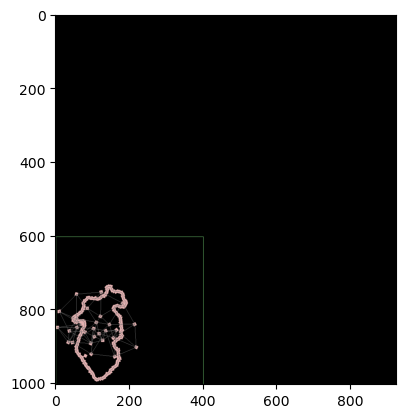

In [127]:
fig, ax, ani = b2d.plot.animate_world(world,t=6)
#help(world)
#print(world.find_body((8, 19), margin=50))
HTML(ani.to_jshtml())

[ 6 18  7]
[16  5  4]
[22 11 10]
[ 8 20  9]
[18 19  7]
[19  8  7]
[ 8 19 20]
[20 21  9]
[ 9 21 10]
[21 22 10]
[17  5 16]
[25 17 16]
[17 25 18]
[17 18  6]
[ 5 17  6]
[13 14  2]
[14  3  2]
[15  3 14]
[15 16  4]
[ 3 15  4]
[26 25 28]
[25 26 18]
[26 19 18]
[23 26 28]
[12 11 22]
[12 23 13]
[21 12 22]
[ 1 13  2]
[12  1 11]
[ 1 12 13]
[24 15 14]
[24 25 16]
[15 24 16]
[13 24 14]
[23 24 13]
[25 24 28]
[24 23 28]
[27 12 21]
[12 27 23]
[23 27 26]
[26 27 19]
[19 27 20]
[27 21 20]
[[46.70066027 19.48896464]
 [45.231543   20.75222692]
 [43.30802922 19.03797139]]
[[48.07892984 24.39933685]
 [49.08345195 21.92550355]
 [50.1603926  25.16793486]]
[[40.25767824 26.72450571]
 [40.00121464 29.36840488]
 [38.24636973 26.52040205]]
[[40.26032662 20.43874378]
 [40.93221369 22.36000712]
 [38.33685629 23.16810816]]
[[45.231543   20.75222692]
 [43.03007921 21.73793818]
 [43.30802922 19.03797139]]
[[43.03007921 21.73793818]
 [40.26032662 20.43874378]
 [43.30802922 19.03797139]]
[[40.26032662 20.43874378]
 [43.030

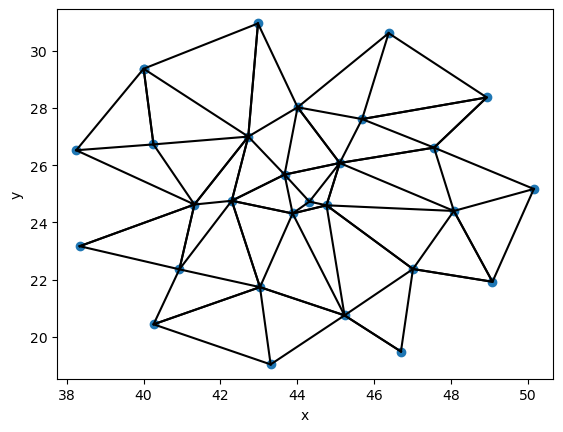

In [122]:
# List of tuples representing points in a plane
points = verts_in#verts+verts_in

# Convert the list of tuples to a numpy array
point_array = np.array(points)

# Perform Delaunay triangulation
triangulation = Delaunay(point_array)

# Print the indices of the vertices for each triangle
for triangle in triangulation.simplices:
    print(triangle)
    
    
    
plt.plot(point_array[:,0], point_array[:,1], 'o')

# Plot the Delaunay triangulation
for triangle in triangulation.simplices:
    print(point_array[triangle])
    plt.plot(point_array[triangle,0], point_array[triangle,1], 'k-')

# Set the plot limits and axis labels
plt.xlim([min(point_array[:,0])-0.5, max(point_array[:,0])+0.5])
plt.ylim([min(point_array[:,1])-0.5, max(point_array[:,1])+0.5])
plt.xlabel('x')
plt.ylabel('y')

# Display the plot
plt.show()

In [45]:

arr1 = np.array([[23., 38.], [22.06662544, 37.52638294], [22.54735469, 37.22750821]])
arr2 = np.array([[23., 38.], [22.03102128, 38.09881694], [22.06662544, 37.52638294]])

# transform arrays into two lists of tuples
lst1 = [(x, y) for x, y in arr1]
lst2 = [(x, y) for x, y in arr2]

# remove duplicate tuples from lst2
lst2 = list(set(lst2) - set(lst1))

# print the result
print(lst1)
print(lst2)

arr = np.array([lst1, lst2], axis=0)
print(arr)

[(23.0, 38.0), (22.06662544, 37.52638294), (22.54735469, 37.22750821)]
[(22.03102128, 38.09881694)]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [58]:
#stacked_arrs = [np.array(lst, axis=0) for lst in lsts]

# initialize a set to store the unique tuples


a [[23.         38.        ]
 [22.06662544 37.52638294]
 [22.54735469 37.22750821]]
t1 (23.0, 38.0)
t2 (22.066625442537852, 37.526382942960964)
t1 (22.066625442537852, 37.526382942960964)
t2 (22.547354693669753, 37.22750820885939)
t1 (22.547354693669753, 37.22750820885939)
t2 (23.0, 38.0)
[[23.         38.        ]
 [22.06662544 37.52638294]
 [22.54735469 37.22750821]]
a [[23.         38.        ]
 [23.60240494 37.1424245 ]
 [23.9619942  37.60768068]]
t1 (23.0, 38.0)
t2 (23.60240493557746, 37.142424496375554)
t1 (23.60240493557746, 37.142424496375554)
t2 (23.96199420348305, 37.60768067916662)
t1 (23.96199420348305, 37.60768067916662)
t2 (23.0, 38.0)
[[23.         38.        ]
 [23.60240494 37.1424245 ]
 [23.9619942  37.60768068]]
a [[23.         38.        ]
 [22.03102128 38.09881694]
 [22.06662544 37.52638294]]
t1 (23.0, 38.0)
t2 (22.031021277486882, 38.098816941589156)
t1 (22.031021277486882, 38.098816941589156)
t2 (22.066625442537852, 37.526382942960964)
t1 (22.066625442537852, 37.5